## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns',None)
sns.set_theme('notebook')

## Loading Train Data

In [2]:
housing_train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

## checking data's shape

In [3]:
housing_train.shape


(1460, 81)

## Checking missing values on train data

In [4]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Checking random 10 observations 


In [5]:
housing_train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
344,345,160,RM,36.0,2592,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,5,3,1976,1976,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,No,Rec,129,BLQ,232,175,536,GasA,TA,Y,SBrkr,536,576,0,1112,0,0,1,1,3,1,TA,4,Typ,0,NaN,Attchd,1976.0,Unf,1,336,TA,TA,Y,182,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,85000
74,75,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,3,6,1915,1950,Gambrel,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,CBlock,Fa,TA,No,Unf,0,Unf,0,840,840,GasA,Gd,N,SBrkr,840,765,0,1605,0,0,2,0,3,2,TA,8,Typ,0,NaN,Detchd,1915.0,Unf,1,379,TA,TA,Y,0,0,202,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
584,585,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,4,7,1935,1995,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,884,884,GasA,Ex,Y,SBrkr,989,584,0,1573,0,0,1,0,3,1,Gd,6,Typ,0,NaN,Detchd,1935.0,Unf,1,240,TA,TA,Y,0,0,54,0,120,0,NaN,NaN,NaN,0,7,2009,WD,Normal,133000
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,147.0,Gd,TA,PConc,Gd,TA,Av,GLQ,697,Unf,0,151,848,GasA,Ex,Y,SBrkr,848,0,0,848,1,0,1,0,1,1,Gd,3,Typ,1,TA,Attchd,2004.0,RFn,2,420,TA,TA,Y,149,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
213,214,20,RL,43.0,13568,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1995,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,716,Unf,0,274,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1996.0,Unf,2,576,TA,TA,Y,224,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,156000
445,446,20,RL,73.0,9855,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,1956,1956,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1436,1436,GasA,Fa,Y,SBrkr,1689,0,0,1689,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1956.0,Unf,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,11,2009,COD,Normal,127500
778,779,90,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,Duplex,1Story,5,5,1977,1977,Gable,CompShg,Plywood,Plywood,BrkFace,320.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,2020,0,0,2020,0,0,2,0,4,2,TA,10,Typ,2,TA,Detchd,1977.0,Unf,2,630,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,144000
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,592,Unf,0,99,691,GasA,Gd,Y,SBrkr,691,807,0,1498,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1995.0,Fin,2,409,TA,TA,Y,315,44,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500
974,975,70,RL,60.0,11414,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,BrkSide,RRAn,Feedr,1Fam,2Story,7,8,1910,1993,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,BrkTil,Gd,TA,No,Unf,0,Unf,0,728,728,Ga

## Test Statistics and Correlations

In [6]:
housing_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
housing_train.corr().T

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

## Spilting Data

In [8]:
X=housing_train.copy()
y=X.pop('SalePrice')

In [9]:
X_train,X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)

## Function to convert Float values of columns into int

In [10]:
def float_int(df):
  float_list=df.select_dtypes('float64').columns.tolist()
  for f_col in float_list:
    df[f_col].fillna(0,inplace=True)
    df[f_col]=pd.to_numeric(df[f_col],errors='coerce').astype(int)
  return df

In [11]:
X_train_copy=float_int(X_train)
X_train=X_train_copy.copy()

In [12]:
X_valid_copy=float_int(X_valid)
X_valid=X_valid_copy.copy()

## Function count how many missing values in the dataset


In [13]:
def count_less(data):
  shape_data=data.shape[0]
  count_dict={}
  for col_name in data.columns:
    if(data[col_name].isna().sum()<=shape_data):
      count_dict[col_name]=data[col_name].isna().sum()
  count_dict={key:value for key,value in count_dict.items() if (value)!=0}
  count_dict=dict(sorted(count_dict.items(),key=lambda x:x[1],reverse=True))
  count_dict_df=pd.DataFrame(count_dict.items(),columns=['Column Names','Missing Values'])
  return count_dict_df

In [14]:
X_train_list=count_less(X_train)


In [15]:
X_valid_list=count_less(X_valid)


## Removing the columns who has more than half of missing values

In [16]:
X_train.drop(columns=X_train_list['Column Names'][:5],axis=1,inplace=True)

In [17]:
X_valid.drop(columns=X_valid_list['Column Names'][:5],axis=1,inplace=True)

In [18]:
X_train.shape

(1095, 75)

In [19]:
X_valid.shape

(365, 75)

## Feature Engineering 

In [20]:
X_train['Age']=(X_train['YrSold'] - X_train['YearBuilt']) 

In [21]:
X_valid['Age']=(X_valid['YrSold'] - X_valid['YearBuilt']) 

## Removing irrelevant Features

In [22]:
drop_list=['Id','LotFrontage','OverallCond','BsmtFinSF2','BsmtFinSF1','BsmtUnfSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageYrBlt','GarageArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','YearBuilt','Condition2']

In [23]:
X_train.drop(drop_list,axis=1,inplace=True)

In [24]:
X_valid.drop(drop_list,axis=1,inplace=True)

In [25]:
X_train.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,SaleType,SaleCondition,Age
1023,120,RL,3182,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,TwnhsE,1Story,7,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14,Gd,TA,PConc,Gd,Gd,No,GLQ,Unf,1346,GasA,Ex,Y,SBrkr,1504,1504,2,Gd,7,Typ,Attchd,Fin,2,TA,TA,Y,156,WD,Normal,3
810,20,RL,10140,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,1Fam,1Story,6,1999,Hip,CompShg,HdBoard,HdBoard,BrkFace,99,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,1040,GasA,Fa,Y,SBrkr,1309,1309,1,Gd,5,Typ,Attchd,RFn,2,TA,TA,Y,265,WD,Normal,32
1384,50,RL,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,1Fam,1.5Fin,6,1950,Gable,CompShg,WdShing,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,Mn,Rec,Unf,560,GasA,TA,Y,SBrkr,698,1258,1,TA,6,Typ,Detchd,Unf,1,TA,TA,P,0,WD,Normal,70
626,20,RL,12342,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1Story,5,1978,Hip,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,TA,No,Unf,Unf,978,GasA,TA,Y,SBrkr,1422,1422,1,TA,6,Min1,Attchd,RFn,1,TA,TA,Y,0,WD,Normal,47
813,20,RL,9750,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,1Fam,1Story,6,1958,Gable,CompShg,MetalSd,MetalSd,BrkFace,243,TA,TA,CBlock,TA,TA,No,Rec,Unf,1442,GasA,Gd,Y,SBrkr,1442,1442,1,TA,7,Typ,Attchd,RFn,1,TA,TA,Y,0,COD,Normal,49


In [26]:
X_train.shape

(1095, 50)

In [27]:
X_valid.head(5)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,SaleType,SaleCondition,Age
892,20,RL,8414,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,1Fam,1Story,6,2003,Hip,CompShg,HdBoard,HdBoard,None,0,TA,TA,CBlock,TA,TA,No,GLQ,Unf,1059,GasA,TA,Y,SBrkr,1068,1068,1,TA,6,Typ,Attchd,RFn,1,TA,TA,Y,192,WD,Normal,43
1105,60,RL,12256,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,1Fam,2Story,8,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,1463,GasA,Ex,Y,SBrkr,1500,2622,2,Gd,9,Typ,Attchd,RFn,2,TA,TA,Y,186,WD,Normal,16
413,30,RM,8960,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,1Fam,1Story,5,1950,Gable,CompShg,WdShing,Wd Shng,None,0,TA,TA,CBlock,TA,TA,No,Unf,Unf,1008,GasA,Gd,Y,FuseA,1028,1028,1,TA,5,Typ,Detchd,Unf,2,TA,TA,Y,0,WD,Normal,83
522,50,RM,5000,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,1Fam,1.5Fin,6,1950,Gable,CompShg,CemntBd,CmentBd,None,0,TA,Gd,CBlock,TA,TA,No,ALQ,Unf,1004,GasA,Ex,Y,SBrkr,1004,1664,2,TA,7,Typ,Detchd,Unf,2,TA,TA,Y,0,WD,Normal,59
1036,20,RL,12898,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,1Fam,1Story,9,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70,Gd,TA,PConc,Ex,TA,Gd,GLQ,Unf,1620,GasA,Ex,Y,SBrkr,1620,1620,2,Ex,6,Typ,Attchd,Fin,3,TA,TA,Y,228,WD,Normal,2


In [28]:
X_valid.shape

(365, 50)

## Removing object columns who have more than 50 % of values count to single variable

In [29]:
remove_list=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','BldgType',
 'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond',
 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType',
 'GarageFinish','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

In [30]:
X_train.drop(remove_list,1,inplace=True)

In [31]:
X_valid.drop(remove_list,1,inplace=True)

In [32]:
X_train

,MSSubClass,LotArea,OverallQual,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,WoodDeckSF,Age
1023,120,3182,7,2006,14,1346,1504,1504,2,7,2,156,3
810,20,10140,6,1999,99,1040,1309,1309,1,5,2,265,32
1384,50,9060,6,1950,0,560,698,1258,1,6,1,0,70
626,20,12342,5,1978,0,978,1422,1422,1,6,1,0,47
813,20,9750,6,1958,243,1442,1442,1442,1,7,1,0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,9317,6,2006,0,1314,1314,1314,2,6,2,0,1
1130,50,7804,4,1950,0,1122,1328,1981,2,7,2,431,81
1294,20,8172,5,1990,0,864,864,864,1,5,2,0,51
860,50,7642,7,1998,0,912,912,1426,1,7,1,0,89


## Removing the outliers 

In [33]:
def remove_out(df):
  for col_name in df.columns:
    q1 = np.quantile(df[col_name],0.25)
    q3=np.quantile(df[col_name],0.75)
    iqr=q3 - q1
    lb=q1 - 1.5 * iqr
    up= q3 + 1.5 * iqr
    df_copy=df[~((df[col_name]<lb) | (df[col_name]>up))]
  return df_copy




In [34]:
X_train=remove_out(X_train)

In [35]:
X_valid=remove_out(X_valid)

## EDA & Data Visualization

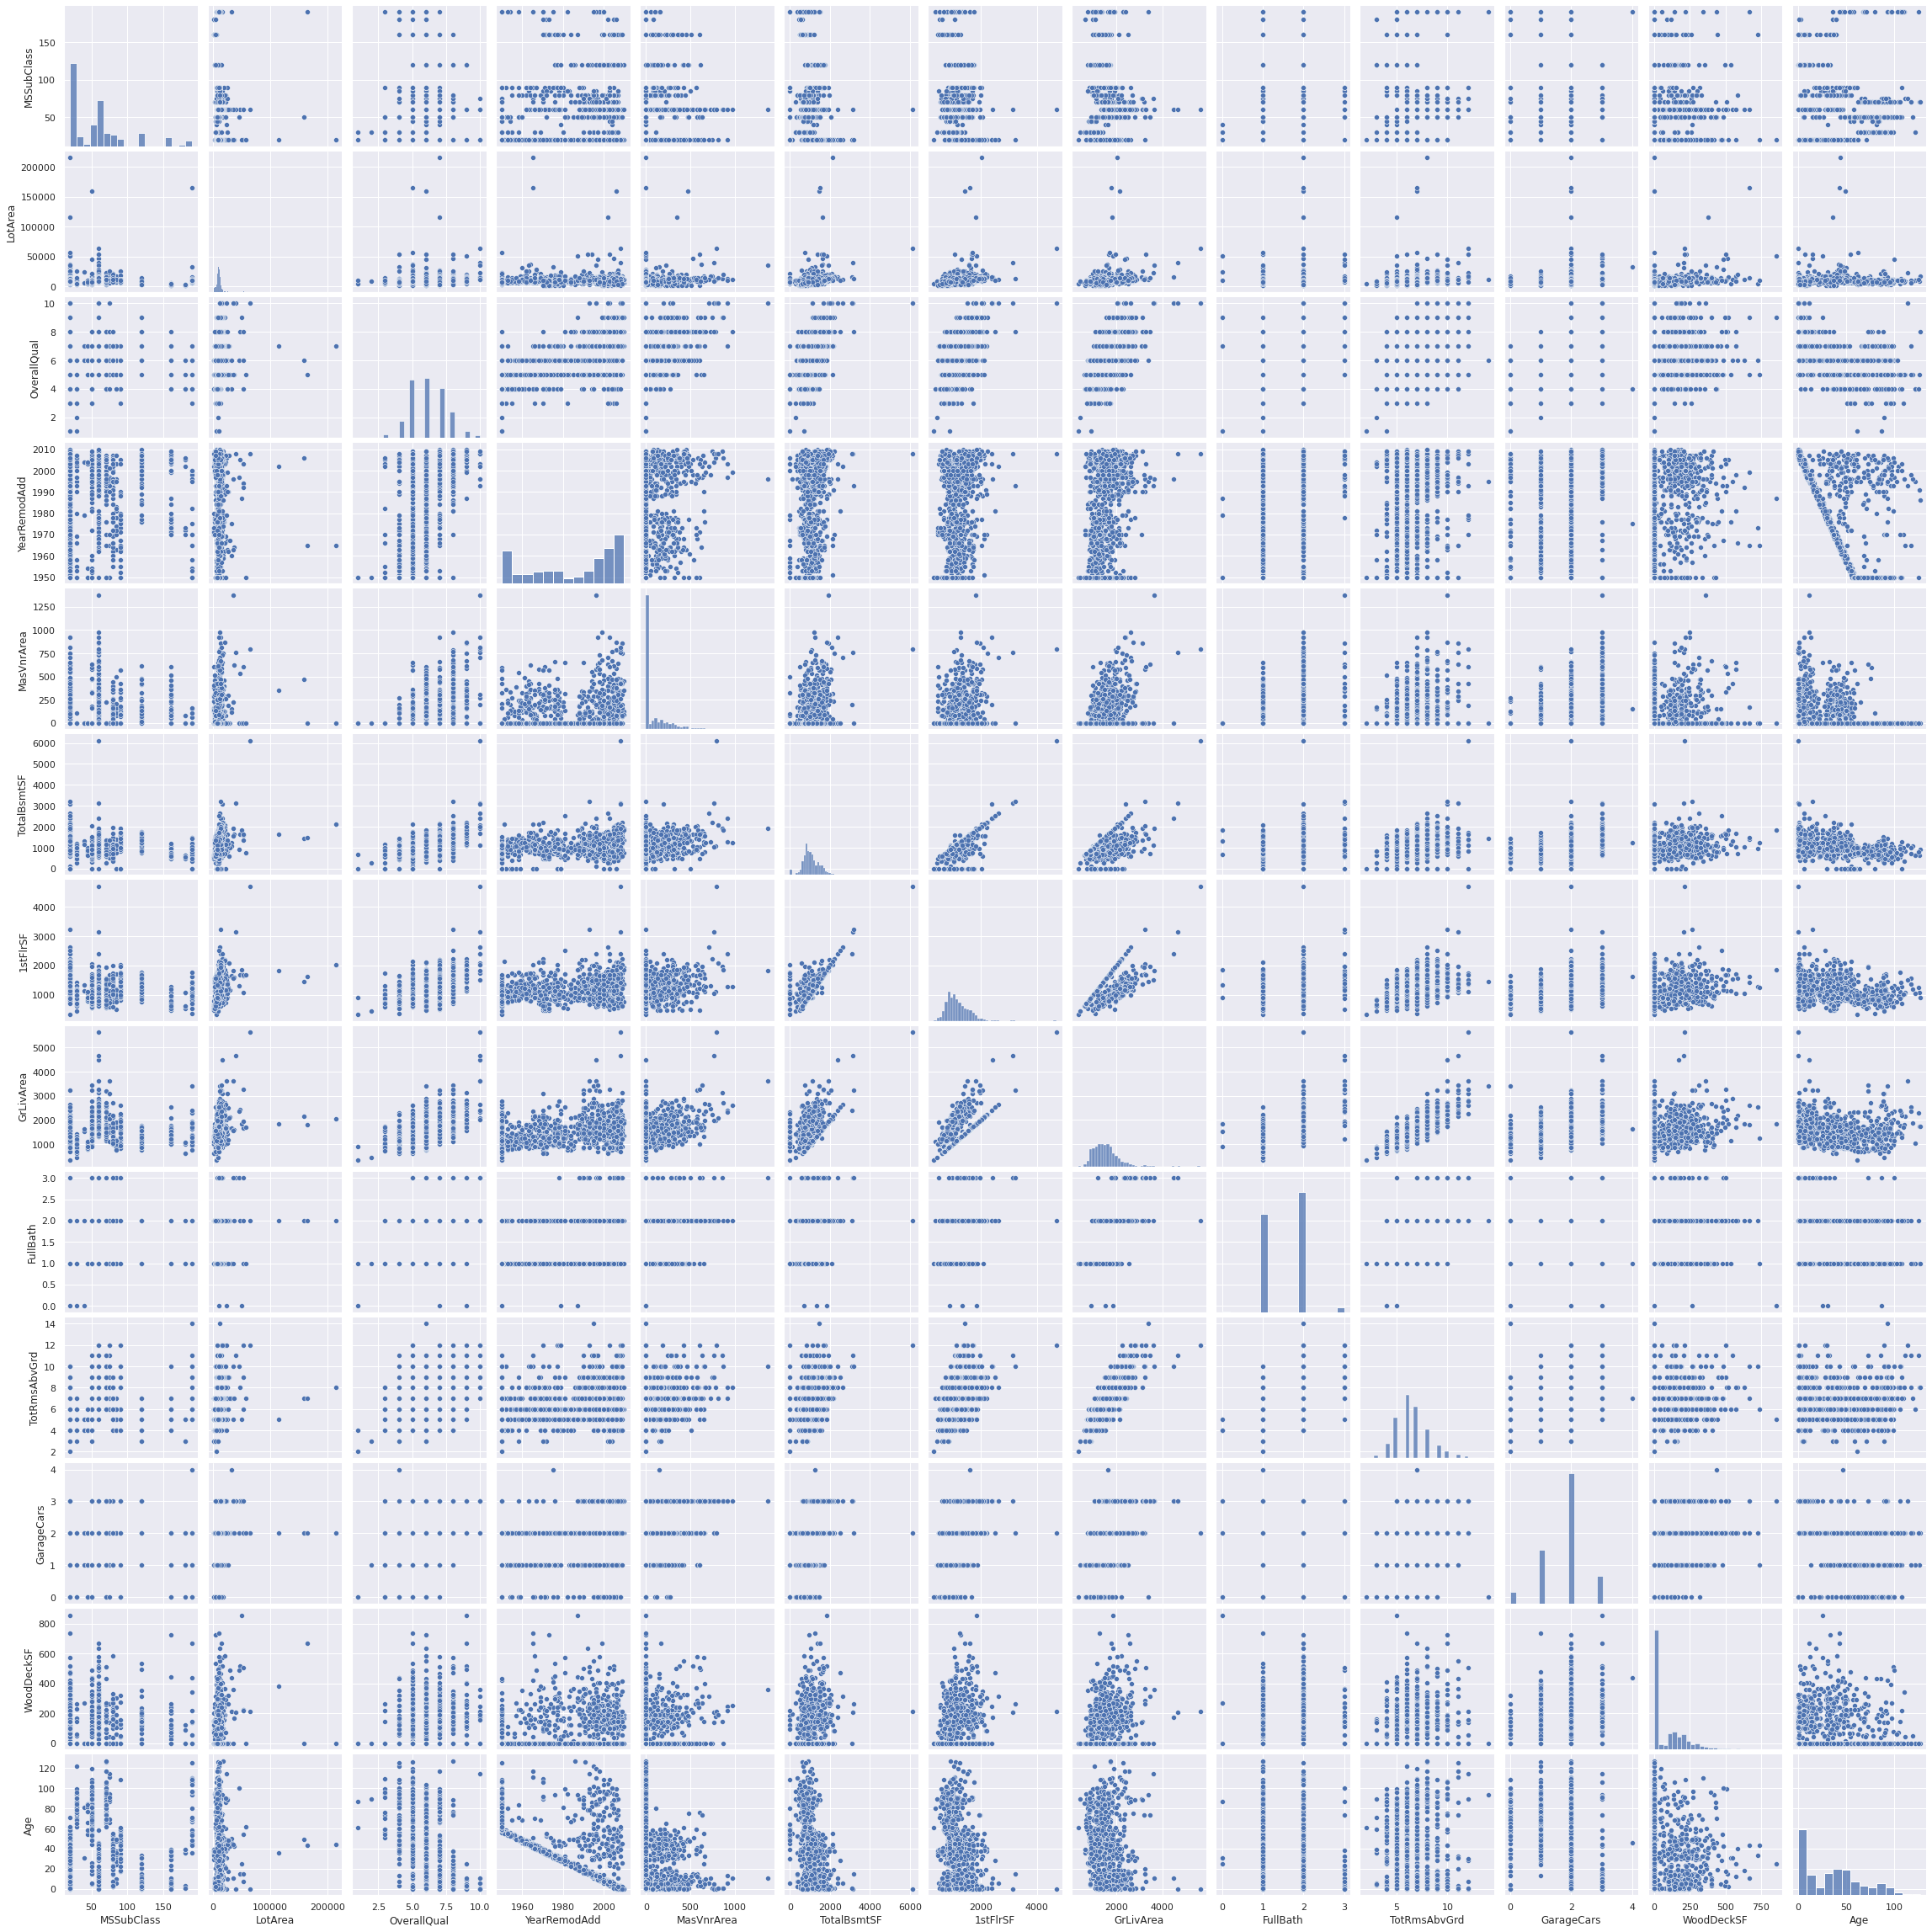

In [36]:
sns.pairplot(X_train)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.show()

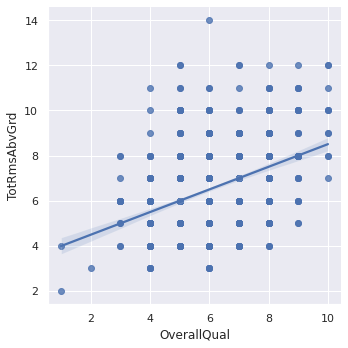

In [37]:
sns.lmplot(x='OverallQual',y='TotRmsAbvGrd',data=X_train)
plt.show()

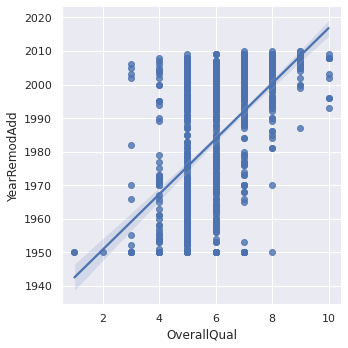

In [38]:
sns.lmplot(x='OverallQual',y='YearRemodAdd',data=X_train)
plt.show()

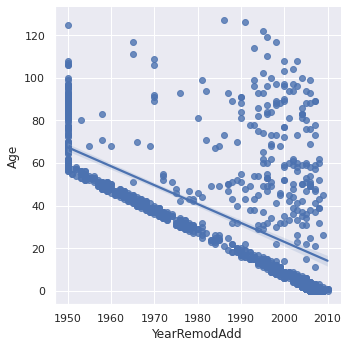

In [39]:
sns.lmplot(x='YearRemodAdd',y='Age',data=X_train)
plt.show()

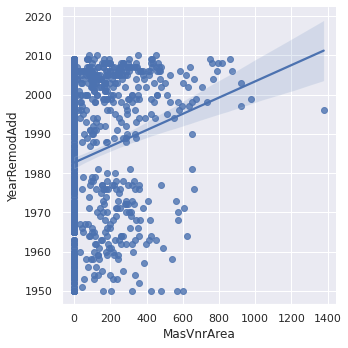

In [40]:
sns.lmplot(x='MasVnrArea',y='YearRemodAdd',data=X_train)
plt.show()

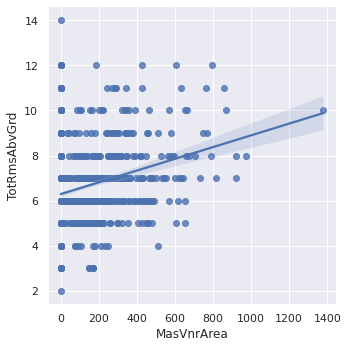

In [41]:
sns.lmplot(x='MasVnrArea',y='TotRmsAbvGrd',data=X_train)
plt.show()


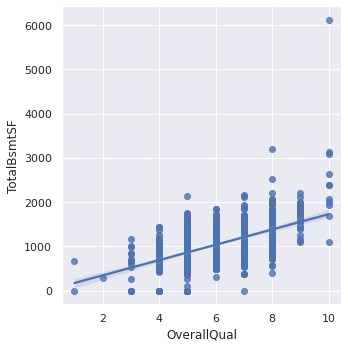

In [42]:
sns.lmplot(x='OverallQual',y='TotalBsmtSF',data=X_train)
plt.show()


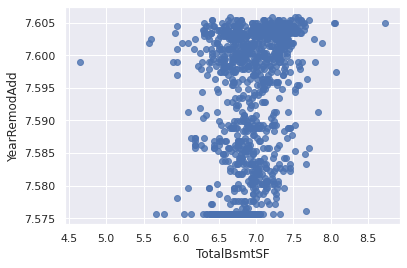

In [43]:
X_train_co=X_train.copy()
X_train_co['TotalBsmtSF']=np.log(X_train_co['TotalBsmtSF'])
X_train_co['YearRemodAdd']=np.log(X_train_co['YearRemodAdd'])

sns.regplot(x='TotalBsmtSF',y='YearRemodAdd',data=X_train_co)
plt.show()


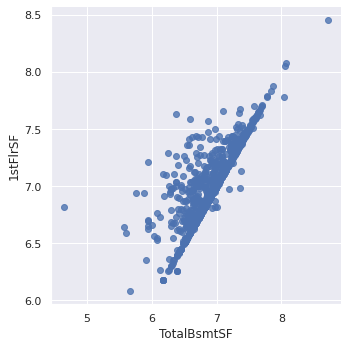

In [44]:
X_train_co=X_train.copy()
X_train_co['TotalBsmtSF']=np.log(X_train['TotalBsmtSF'])
X_train_co['1stFlrSF']=np.log(X_train['1stFlrSF'])
sns.lmplot(x='TotalBsmtSF',y='1stFlrSF',data=X_train_co)
plt.show()


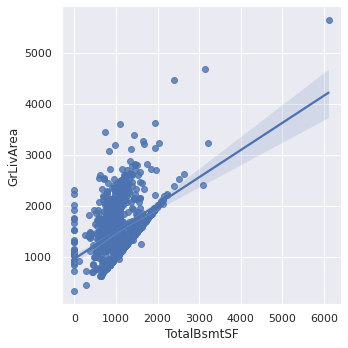

In [45]:
sns.lmplot(x='TotalBsmtSF',y='GrLivArea',data=X_train)
plt.show()


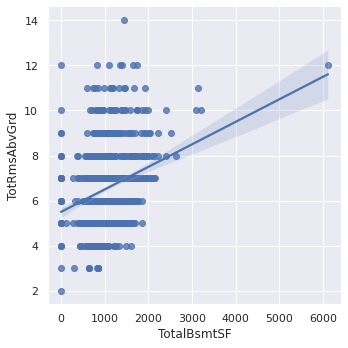

In [46]:
sns.lmplot(x='TotalBsmtSF',y='TotRmsAbvGrd',data=X_train)
plt.show()
#useless

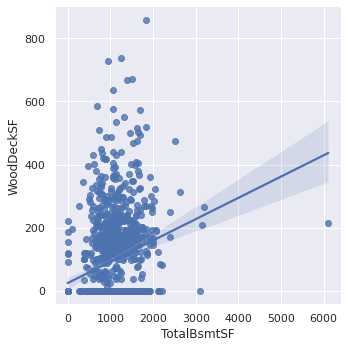

In [47]:
sns.lmplot(x='TotalBsmtSF',y='WoodDeckSF',data=X_train)
plt.show()
#useless

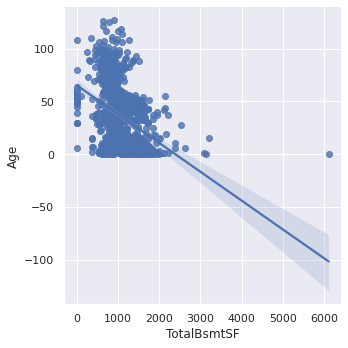

In [48]:
sns.lmplot(x='TotalBsmtSF',y='Age',data=X_train)
plt.show()

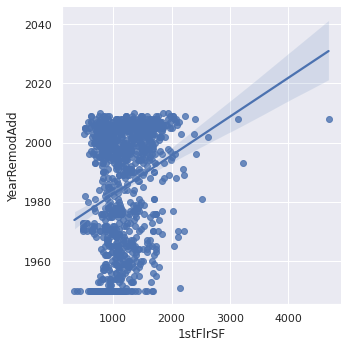

In [49]:
sns.lmplot(x='1stFlrSF',y='YearRemodAdd',data=X_train)
plt.show()

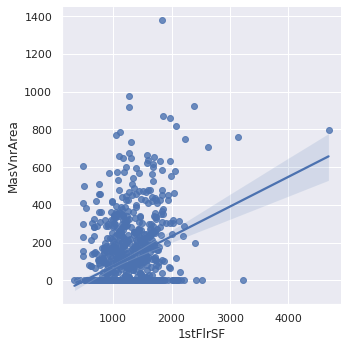

In [50]:
sns.lmplot(x='1stFlrSF',y='MasVnrArea',data=X_train)
plt.show()

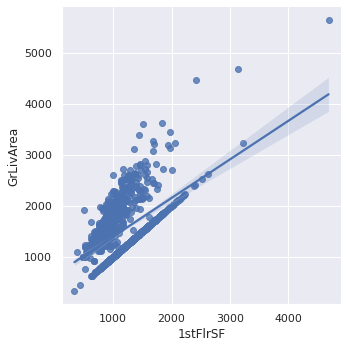

In [51]:
sns.lmplot(x='1stFlrSF',y='GrLivArea',data=X_train)
plt.show()

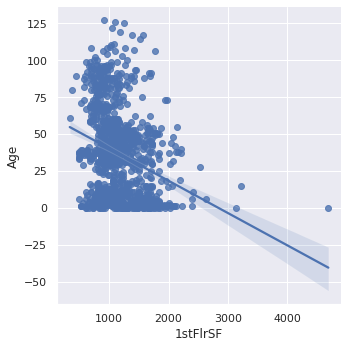

In [52]:
sns.lmplot(x='1stFlrSF',y='Age',data=X_train)
plt.show()

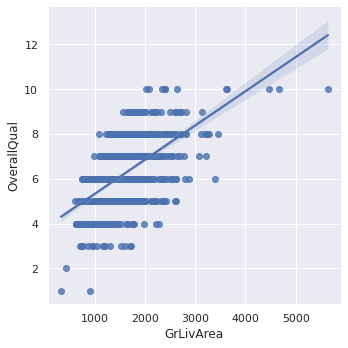

In [53]:
sns.lmplot(x='GrLivArea',y='OverallQual',data=X_train)
plt.show()

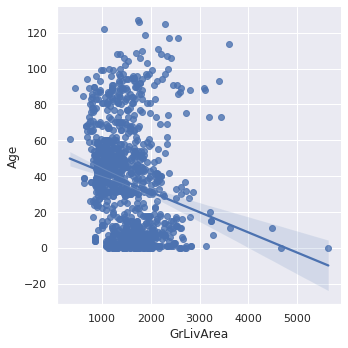

In [54]:
sns.lmplot(x='GrLivArea',y='Age',data=X_train)
plt.show()

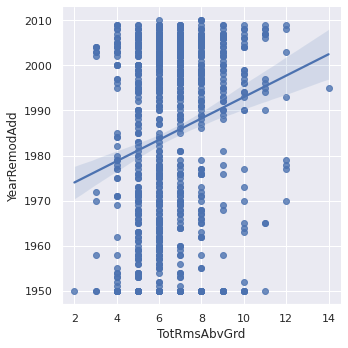

In [55]:
sns.lmplot(x='TotRmsAbvGrd',y='YearRemodAdd',data=X_train)
plt.show()

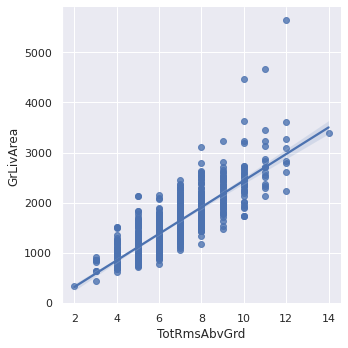

In [56]:
sns.lmplot(x='TotRmsAbvGrd',y='GrLivArea',data=X_train)
plt.show()

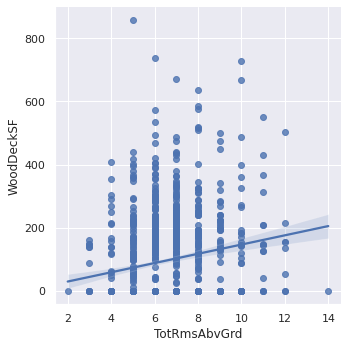

In [57]:
sns.lmplot(x='TotRmsAbvGrd',y='WoodDeckSF',data=X_train)
plt.show()

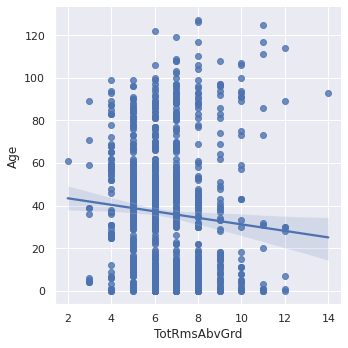

In [58]:
sns.lmplot(x='TotRmsAbvGrd',y='Age',data=X_train)
plt.show()

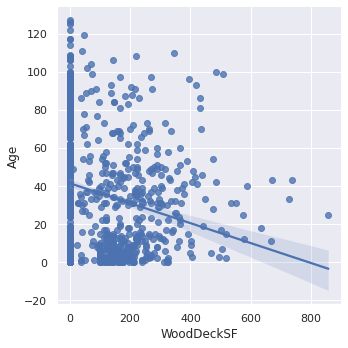

In [59]:
sns.lmplot(x='WoodDeckSF',y='Age',data=X_train)
plt.show()

## Concat training and valid  data

In [60]:
housing_price_copy_train=pd.concat([X_train,y_train],1)

In [61]:
housing_price_copy_valid=pd.concat([X_valid,y_valid],1)

In [62]:
drop_list_col=['MasVnrArea','WoodDeckSF']

In [63]:
housing_price_copy_train.drop(drop_list_col,1,inplace=True)

In [64]:
housing_price_copy_valid.drop(drop_list_col,1,inplace=True)

## Respliting Data

In [65]:
X_train=housing_price_copy_train.copy()
y_train=X_train.pop('SalePrice')

In [66]:
X_valid=housing_price_copy_valid.copy()
y_valid=X_valid.pop('SalePrice')

In [67]:
X_train.shape

(1095, 11)

In [68]:
y_train.shape

(1095,)

In [69]:
X_valid.shape

(365, 11)

In [70]:
y_valid.shape

(365,)

In [71]:
X_train.head(10)

,MSSubClass,LotArea,OverallQual,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,Age
0,60.0,8450.0,7.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,5.0
1,20.0,9600.0,6.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,31.0
2,60.0,11250.0,7.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,7.0
3,70.0,9550.0,7.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,91.0
4,60.0,14260.0,8.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,8.0
5,50.0,14115.0,5.0,1995.0,796.0,796.0,1362.0,1.0,5.0,2.0,16.0
6,20.0,10084.0,8.0,2005.0,1686.0,1694.0,1694.0,2.0,7.0,2.0,3.0
7,60.0,10382.0,7.0,1973.0,1107.0,1107.0,2090.0,2.0,7.0,2.0,36.0
8,50.0,6120.0,7.0,1950.0,952.0,1022.0,1774.0,2.0,8.0,2.0,77.0
9,190.0,7420.0,5.0,1950.0,991.0,1077.0,1077.0,1.0,5.0,1.0,69.0


In [72]:
X_train=float_int(X_train)

In [73]:
X_valid=float_int(X_valid)

## Scaling the data

In [74]:
scaler=StandardScaler()

In [75]:
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)

## Model : RandomForestRegressor

In [76]:
model=RandomForestRegressor(random_state=1)

## Parameter Tunning

In [77]:
param_grid={
    'n_estimators':[150, 300, 390, 500, 600],
    'min_samples_leaf': [2,3,4,5,7],
    'min_samples_split': [2, 3, 5, 8, 10],
    'max_features': [2, 3, 5, 7, 9]
    }


## Grid Search

In [78]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2,)

In [79]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=390; total time=   1.3s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=390; total time=   1.2s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   1.6s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   1.9s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=150; total time=   0.5s
[CV] END max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   0.9s
[CV] END 

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_features': [2, 3, 5, 7, 9],
                         'min_samples_leaf': [2, 3, 4, 5, 7],
                         'min_samples_split': [2, 3, 5, 8, 10],
                         'n_estimators': [150, 300, 390, 500, 600]},
             verbose=2)

## Testing Model on test data

In [80]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mean_ab_err=mean_absolute_error(test_labels,predictions)
    print('mean absolute error',mean_ab_err)
    return mean_ab_err

In [81]:
best_grid=grid_search.best_estimator_

In [82]:
grid_accuracy=evaluate(best_grid,X_valid,y_valid)

mean absolute error 18668.66322916206

[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=150; total time=   0.7s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=300; total time=   1.4s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=390; total time=   1.8s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.8s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=2, n_estimators=600; total time=   2.9s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=3, n_estimators=300; total time=   1.5s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=3, n_estimators=390; total time=   1.9s
[CV] END max_features=9, min_samples_leaf=5, min_samples_split=3, n_estimators=500; total time=   2.7s
[CV] END max_features=9, min_sampl